In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv("Salary_dataset.csv")
print(df)
print(df.isnull().any().any())

    Unnamed: 0  YearsExperience    Salary
0            0              1.2   39344.0
1            1              1.4   46206.0
2            2              1.6   37732.0
3            3              2.1   43526.0
4            4              2.3   39892.0
5            5              3.0   56643.0
6            6              3.1   60151.0
7            7              3.3   54446.0
8            8              3.3   64446.0
9            9              3.8   57190.0
10          10              4.0   63219.0
11          11              4.1   55795.0
12          12              4.1   56958.0
13          13              4.2   57082.0
14          14              4.6   61112.0
15          15              5.0   67939.0
16          16              5.2   66030.0
17          17              5.4   83089.0
18          18              6.0   81364.0
19          19              6.1   93941.0
20          20              6.9   91739.0
21          21              7.2   98274.0
22          22              8.0  1

In [4]:
df = df.iloc[:,1:]
df1 = df.describe().T
df2 = pd.DataFrame(df1)
print(df2.to_string())

                 count          mean           std      min       25%      50%        75%       max
YearsExperience   30.0      5.413333      2.837888      1.2      3.30      4.8       7.80      10.6
Salary            30.0  76004.000000  27414.429785  37732.0  56721.75  65238.0  100545.75  122392.0


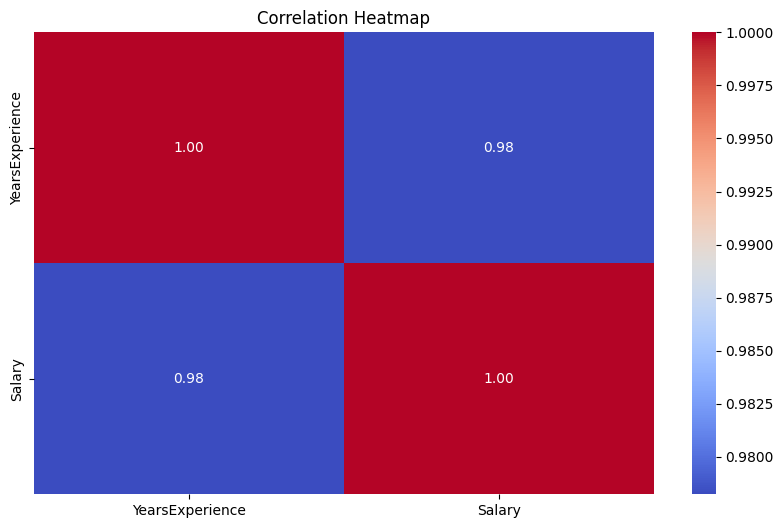

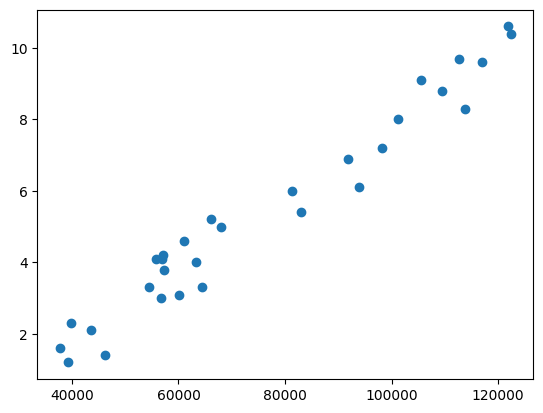

In [5]:
# Visualizing correlation matrix with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
plt.scatter(df['Salary'],df['YearsExperience'])

In [6]:
from sklearn.model_selection import train_test_split
X = df['YearsExperience'].values.reshape(-1,1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=47, shuffle=True)



In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

[ 72569.16042482  45383.78112079 123190.21154268  63194.89169929
 108191.38158184  64132.31857185]


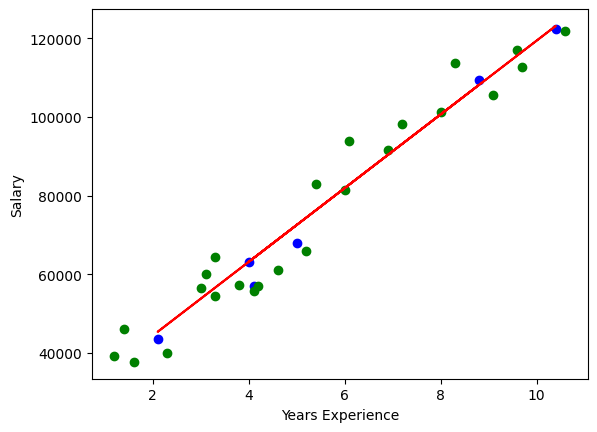

In [8]:
y_pred = regressor.predict(X_test)
print(y_pred)
plt.scatter(X_test, y_test, color='blue', label='Test data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.scatter(X_train,y_train,color='green',label='Train data')
plt.xlabel('Years Experience')
plt.ylabel('Salary')

plt.show()

In [9]:
import random
years = [random.uniform(2,10) for _ in range(10)]
print(years)

[3.183215619806063, 7.6362564920992035, 7.095708897820224, 3.0679856490561317, 7.211894662792275, 3.438751090227413, 7.423398366873447, 3.369020945908102, 4.102688580978132, 4.29490040364474]


In [10]:
output = regressor.predict([[13.8]])
print(output)

[155062.72520948]


In [11]:
print(regressor.coef_)

[9374.26872553]


In [12]:
print(regressor.intercept_)

25697.816797175168


In [13]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error
print(r2_score(y_test,y_pred))

print(mean_absolute_percentage_error(y_test,y_pred))


0.98399193890564
0.04250531295845331
